In [2]:
import torch

pose_list = []
weight_list = []
for i in range(24):
    pose, weight = torch.load(f'data_{i}.pt')
    pose = pose.to('cpu')
    weight = weight.to('cpu')
    pose_list.append(pose)
    weight_list.append(weight)

In [22]:
pose.min(dim=0)[0]

tensor([0., 0., 0.])

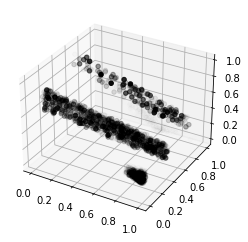

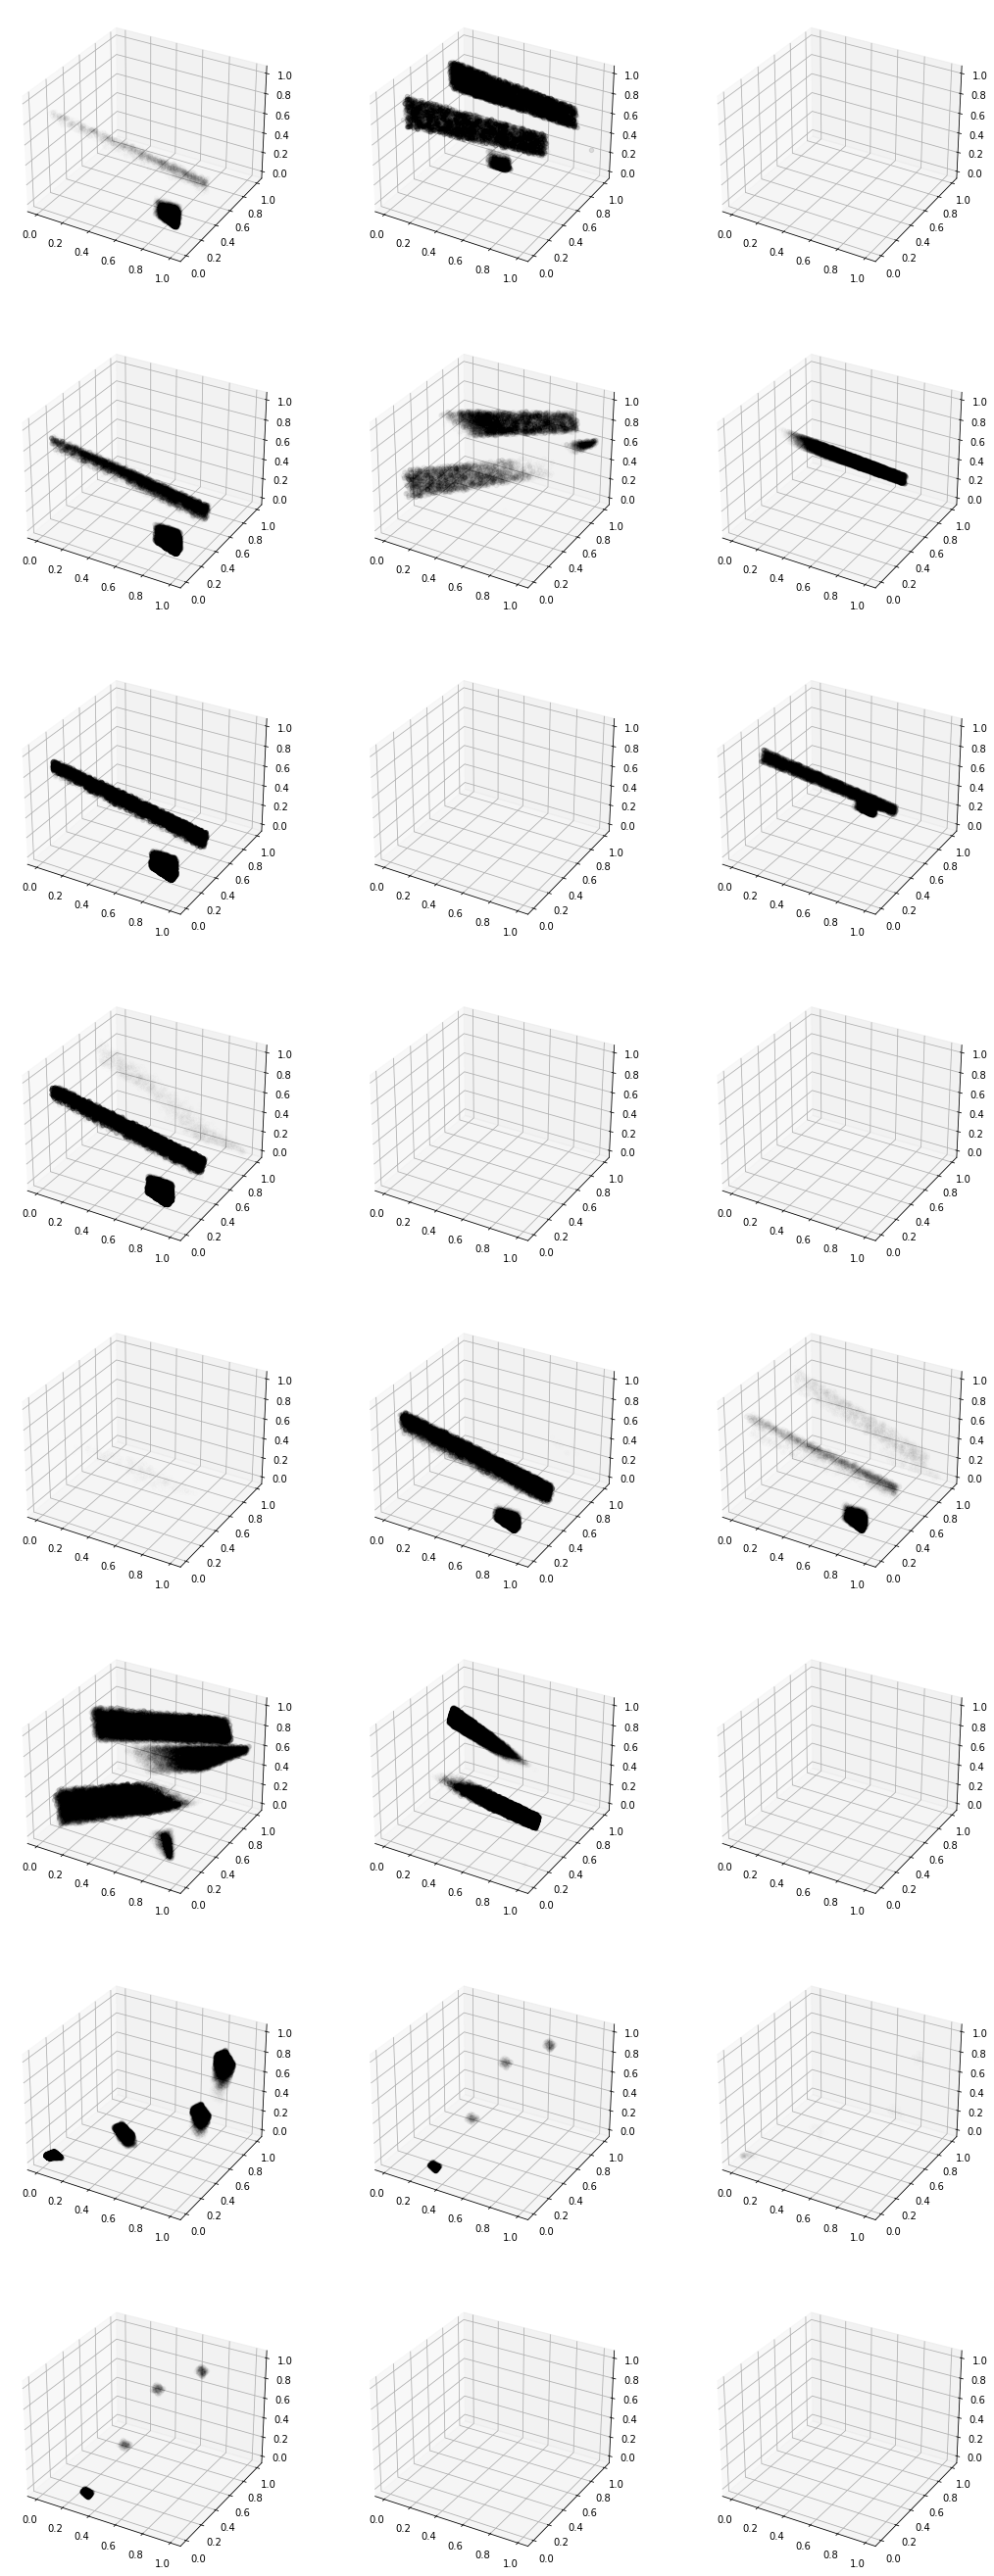

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

fig = plt.figure(figsize=(18, 48))  # 创建一个大图

for j in range(8):
    for i in range(3):
        index = j * 3 + i
        ax = fig.add_subplot(8, 3, index+1, projection='3d')  # 创建一个 3D 子图

        # 取出 pose 和 weight
        pose = pose_list[index]
        weight = weight_list[index]

        # 归一化
        pose = (pose - pose.min(dim=0)[0]) / (pose.max(dim=0)[0] - pose.min(dim=0)[0])

        # 计算距离
        # distances = torch.sum(pose**2, dim=1)

        # 排序
        indices = torch.argsort(pose[:, 2])  # 按照 z 值排序
        pose = pose[indices]
        weight = weight[indices]

        # 在子图上画出所有的点
        ax.scatter(pose.detach().numpy()[:, 0], pose.detach().numpy()[:, 1], pose.detach().numpy()[:, 2], c='black', alpha=weight.detach().numpy())

plt.show()

In [32]:
#2 7 10 11 12 17 20 22 23 这些姿势都没有points